# setting

In [8]:
import dlib
import cv2
import cv2 as cv
import numpy as np
import matplotlib.patches as patches
import urllib.request as urlreq
import os
import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib.patches as patches

In [9]:
face_det = dlib.get_frontal_face_detector()
landmark_model = dlib.shape_predictor("C:/Users/Serin Kim/workspace/AISYS/DMFN-master/triangle_coordinates/shape_predictor_68_face_landmarks.dat")

## 이미지 경로 입력

In [10]:
image_path="C:/Users/Serin Kim/workspace/AISYS/DMFN-master/sample_original_img.png"

## func

In [11]:
def triangle_coordinates(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (400, 400))

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)

    # 얼굴 검출
    faces = face_det(image_gray)
    
    triangle_coords = []

    if len(faces) != 0:
        for face in faces:
            # 랜드마크 검출
            lm = landmark_model(image_rgb, face)
            lm_point = np.array([[p.x, p.y] for p in lm.parts()])

        image_rgb_copy = image_rgb.copy()
        landmark_list = lm_point

        plt.imshow(image_rgb_copy)

        num = 1
        for i in range(14):
            triangle = patches.Polygon(
                [(landmark_list[29][0], landmark_list[29][1]),
                 (landmark_list[num][0], landmark_list[num][1]),
                 (landmark_list[num+1][0], landmark_list[num+1][1])], 
                closed=True, edgecolor='black', facecolor='black'
            )
            plt.gca().add_patch(triangle)
            triangle_coords.append([(landmark_list[29][0], landmark_list[29][1]),
                                    (landmark_list[num][0], landmark_list[num][1]),
                                    (landmark_list[num+1][0], landmark_list[num+1][1])])
            num = num + 1

        plt.axis("off")
        
        plt.show()

        return triangle_coords
    else:
        print('\nFace landmarks are not recognizable\n')
        return None



In [ ]:
def triangle_coordinates(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (400, 400))

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)

    # 얼굴 검출
    faces = face_det(image_gray)
    
    triangle_coords = []

    if len(faces) != 0:
        for face in faces:
            # 랜드마크 검출
            lm = landmark_model(image_rgb, face)
            lm_point = np.array([[p.x, p.y] for p in lm.parts()])

        image_rgb_copy = image_rgb.copy()
        landmark_list = lm_point

        plt.imshow(image_rgb_copy)

        num = 1
        for i in range(14):
            triangle = patches.Polygon(
                [(landmark_list[29][0], landmark_list[29][1]),
                 (landmark_list[num][0], landmark_list[num][1]),
                 (landmark_list[num+1][0], landmark_list[num+1][1])], 
                closed=True, edgecolor='black', facecolor='black'
            )

        return triangle_coords
    else:
        print('\nFace landmarks are not recognizable\n')
        return None



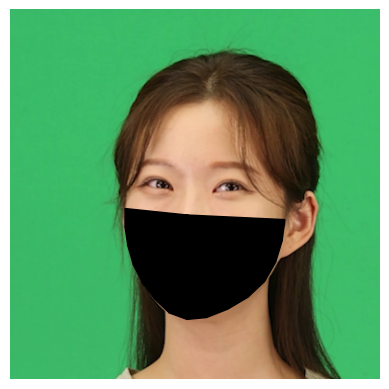

[[(191, 222), (124, 215), (124, 235)], [(191, 222), (124, 235), (127, 255)], [(191, 222), (127, 255), (133, 276)], [(191, 222), (133, 276), (143, 295)], [(191, 222), (143, 295), (156, 313)], [(191, 222), (156, 313), (172, 328)], [(191, 222), (172, 328), (191, 335)], [(191, 222), (191, 335), (212, 333)], [(191, 222), (212, 333), (235, 324)], [(191, 222), (235, 324), (257, 311)], [(191, 222), (257, 311), (275, 294)], [(191, 222), (275, 294), (287, 273)], [(191, 222), (287, 273), (294, 250)], [(191, 222), (294, 250), (297, 227)]]


In [12]:
# 함수 실행
triangle_coordinates = triangle_coordinates(image_path)
print(triangle_coordinates)

In [ ]:
import torch.utils.data as data
from PIL import Image
import data.util as util
import random
import torchvision.transforms as transforms
import numpy as np
import torch
import cv2
import dlib
from matplotlib import patches
import matplotlib.pyplot as plt

# Face detector and landmark model
face_det = dlib.get_frontal_face_detector()
landmark_model = dlib.shape_predictor("C:/Users/Serin Kim/workspace/AISYS/DMFN-master/triangle_coordinates/shape_predictor_68_face_landmarks.dat")

def default_loader(path):
    return Image.open(path).convert('RGB')

def default_flist_reader(flist):
    imlist = []
    with open(flist, 'r') as rf:
        for line in rf.readlines():
            impath = line.strip()
            imlist.append(impath)
    return imlist

def triangle_coordinates(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (400, 400))

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)

    # 얼굴 검출
    faces = face_det(image_gray)
    
    triangle_coords = []

    if len(faces) != 0:
        for face in faces:
            # 랜드마크 검출
            lm = landmark_model(image_rgb, face)
            lm_point = np.array([[p.x, p.y] for p in lm.parts()])

        image_rgb_copy = image_rgb.copy()
        landmark_list = lm_point

        plt.imshow(image_rgb_copy)

        num = 1
        for i in range(14):
            triangle = [(landmark_list[29][0], landmark_list[29][1]),
                        (landmark_list[num][0], landmark_list[num][1]),
                        (landmark_list[num+1][0], landmark_list[num+1][1])]
            triangle_coords.append(triangle)
            num += 1

        return triangle_coords
    else:
        print('\nFace landmarks are not recognizable\n')
        return None

class ImageFilelist(data.Dataset):
    def __init__(self, opt, flist_reader=default_flist_reader, loader=default_loader):
        self.imlist = flist_reader(opt['image_list'])
        self.loader = loader
        self.opt = opt

        transform_list = [transforms.ToTensor(),
                          transforms.Normalize((0.5, 0.5, 0.5),
                                               (0.5, 0.5, 0.5))]  # [0, 1] --> [-1, 1]
        self.transform = transforms.Compose(transform_list)
        if opt['mask_list'] is not None and opt['mask_type'] == 'irregular':
            self.mask_data = flist_reader(opt['mask_list'])

    def __getitem__(self, index):
        impath = self.imlist[index]
        img = self.loader(impath)
        img = self.resize(img, self.opt['img_shape'][2], self.opt['img_shape'][1])
        img_tensor = self.transform(img)  # Tensor [C, H, W], [-1, 1]
        if self.opt['mask_type'] == 'regular':
            bbox_tensor, mask_tensor = self.load_mask(index)  # Tensor [1, H, W]
        else:
            mask_tensor = self.create_mask_tensor(impath)
            bbox = util.bbox(self.opt)
            bbox_tensor = torch.from_numpy(np.array(bbox))

        # generate mask, 1 represents masked point
        # mask: mask region {0, 1}
        # x_incomplete: incomplete image, [-1, 1]
        # returns: [-1, 1] as predicted image
        input_tensor = img_tensor * (1. - mask_tensor)  # [C, H, W]
        return {'input': input_tensor, 'bbox': bbox_tensor, 'mask': mask_tensor, 'target': img_tensor, 'paths': impath}

    def __len__(self):
        return len(self.imlist)

    def load_mask(self, index):
        if self.opt['mask_type'] == 'regular':
            bbox = util.bbox(self.opt)
            mask = util.bbox2mask(bbox, self.opt)  # Tensor, [1, H, W]
            bbox_t = torch.from_numpy(np.array(bbox))
            return bbox_t, mask

        elif self.opt['mask_type'] == 'irregular':  # irregular mask
            if self.opt['use_shuffle']:  # train or val (not include test)
                mask_index = random.randint(0, len(self.mask_data) - 1)
            else:
                mask_index = index
            mask = self.loader(self.mask_data[mask_index]).convert('L')  # image [H, W, 1], [0, 255]
            mask = np.asarray(mask.resize((self.opt['img_shape'][2], self.opt['img_shape'][1]), Image.BICUBIC))
            mask = (mask > 0).astype(np.float32)
            mask = torch.from_numpy(np.expand_dims(mask, 0))  # Tensor, [1, H, W]
            return mask
        else:
            raise NotImplementedError('Unsupported mask type: {}'.format(self.opt['mask_type']))

    def create_mask_tensor(self, image_path):
        triangle_coords = triangle_coordinates(image_path)
        if triangle_coords is None:
            raise ValueError('Face landmarks are not recognizable')

        # Create mask image
        mask_image = Image.new('L', (self.opt['img_shape'][2], self.opt['img_shape'][1]), 0)
        draw = ImageDraw.Draw(mask_image)
        for triangle in triangle_coords:
            draw.polygon(triangle, outline=1, fill=1)

        # Convert mask image to numpy array and then to tensor
        mask = np.array(mask_image, dtype=np.float32)
        mask_tensor = torch.from_numpy(np.expand_dims(mask, 0))  # Tensor, [1, H, W]
        return mask_tensor

    def resize(self, img, height, width, centerCrop=False):  # mainly for celeba dataset | place365 | paris_streetview
        imgw, imgh = img.size[0], img.size[1]  # [w, h, c]

        if imgh != imgw:

            if centerCrop:
                # center crop, mainly for celeba
                side = np.minimum(imgh, imgw)
                j = (imgh - side) // 2
                i = (imgw - side) // 2
                img = img.crop((i, j, side, side))
            else:
                # random crop, mainly for place365 and paris_streetview
                side = np.minimum(imgh, imgw)
                ix = random.randrange(0, imgw - side + 1)
                iy = random.randrange(0, imgh - side + 1)
                img = img.crop((ix, iy, side, side))

        img = img.resize((width, height), Image.BICUBIC)

        return img


In [ ]:
import torch.utils.data as data
from PIL import Image
import data.util as util
import random
import torchvision.transforms as transforms
import numpy as np
import torch
import cv2
import dlib
from matplotlib import patches
import matplotlib.pyplot as plt

# Face detector and landmark model
face_det = dlib.get_frontal_face_detector()
landmark_model = dlib.shape_predictor("C:/Users/Serin Kim/workspace/AISYS/DMFN-master/triangle_coordinates/shape_predictor_68_face_landmarks.dat")

def default_loader(path):
    return Image.open(path).convert('RGB')

def default_flist_reader(flist):
    imlist = []
    with open(flist, 'r') as rf:
        for line in rf.readlines():
            impath = line.strip()
            imlist.append(impath)
    return imlist

def triangle_coordinates(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (400, 400))

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)

    # 얼굴 검출
    faces = face_det(image_gray)
    
    triangle_coords = []

    if len(faces) != 0:
        for face in faces:
            # 랜드마크 검출
            lm = landmark_model(image_rgb, face)
            lm_point = np.array([[p.x, p.y] for p in lm.parts()])

        image_rgb_copy = image_rgb.copy()
        landmark_list = lm_point

        num = 1
        for i in range(14):
            triangle = [
                (landmark_list[29][0], landmark_list[29][1]),
                (landmark_list[num][0], landmark_list[num][1]),
                (landmark_list[num+1][0], landmark_list[num+1][1])
            ]
            triangle_coords.append(triangle)
            num += 1

        return triangle_coords
    else:
        print('\nFace landmarks are not recognizable\n')
        return None

class ImageFilelist(data.Dataset):
    def __init__(self, opt, flist_reader=default_flist_reader, loader=default_loader):
        self.imlist = flist_reader(opt['image_list'])
        self.loader = loader
        self.opt = opt

        transform_list = [transforms.ToTensor(),
                          transforms.Normalize((0.5, 0.5, 0.5),
                                               (0.5, 0.5, 0.5))]  # [0, 1] --> [-1, 1]
        self.transform = transforms.Compose(transform_list)
        if opt['mask_list'] is not None and opt['mask_type'] == 'irregular':
            self.mask_data = flist_reader(opt['mask_list'])

    def __getitem__(self, index):
        impath = self.imlist[index]
        img = self.loader(impath)
        img = self.resize(img, self.opt['img_shape'][2], self.opt['img_shape'][1])
        img_tensor = self.transform(img)  # Tensor [C, H, W], [-1, 1]
        if self.opt['mask_type'] == 'regular':
            bbox_tensor, mask_tensor = self.load_mask(index)  # Tensor [1, H, W]
        else:
            mask_tensor = self.create_mask_tensor(impath)
            bbox = util.bbox(self.opt)
            bbox_tensor = torch.from_numpy(np.array(bbox))

        # generate mask, 1 represents masked point
        # mask: mask region {0, 1}
        # x_incomplete: incomplete image, [-1, 1]
        # returns: [-1, 1] as predicted image
        input_tensor = img_tensor * (1. - mask_tensor)  # [C, H, W]
        return {'input': input_tensor, 'bbox': bbox_tensor, 'mask': mask_tensor, 'target': img_tensor, 'paths': impath}

    def __len__(self):
        return len(self.imlist)

    def load_mask(self, index):
        if self.opt['mask_type'] == 'regular':
            bbox = util.bbox(self.opt)
            mask = util.bbox2mask(bbox, self.opt)  # Tensor, [1, H, W]
            bbox_t = torch.from_numpy(np.array(bbox))
            return bbox_t, mask

        elif self.opt['mask_type'] == 'irregular':  # irregular mask
            if self.opt['use_shuffle']:  # train or val (not include test)
                mask_index = random.randint(0, len(self.mask_data) - 1)
            else:
                mask_index = index
            mask = self.loader(self.mask_data[mask_index]).convert('L')  # image [H, W, 1], [0, 255]
            mask = np.asarray(mask.resize((self.opt['img_shape'][2], self.opt['img_shape'][1]), Image.BICUBIC))
            mask = (mask > 0).astype(np.float32)
            mask = torch.from_numpy(np.expand_dims(mask, 0))  # Tensor, [1, H, W]
            return mask
        else:
            raise NotImplementedError('Unsupported mask type: {}'.format(self.opt['mask_type']))

    def create_mask_tensor(self, image_path):
        triangle_coords = triangle_coordinates(image_path)
        if triangle_coords is None:
            raise ValueError('Face landmarks are not recognizable')

        # Create mask image
        mask_image = np.zeros((self.opt['img_shape'][1], self.opt['img_shape'][2]), dtype=np.float32)
        for triangle in triangle_coords:
            rr, cc = polygon(np.array([p[1] for p in triangle]), np.array([p[0] for p in triangle]), mask_image.shape)
            mask_image[rr, cc] = 1

        # Convert mask image to tensor
        mask_tensor = torch.from_numpy(np.expand_dims(mask_image, 0))  # Tensor, [1, H, W]
        return mask_tensor

    def resize(self, img, height, width, centerCrop=False):  # mainly for celeba dataset | place365 | paris_streetview
        imgw, imgh = img.size[0], img.size[1]  # [w, h, c]

        if imgh != imgw:

            if centerCrop:
                # center crop, mainly for celeba
                side = np.minimum(imgh, imgw)
                j = (imgh - side) // 2
                i = (imgw - side) // 2
                img = img.crop((i, j, side, side))
            else:
                # random crop, mainly for place365 and paris_streetview
                side = np.minimum(imgh, imgw)
                ix = random.randrange(0, imgw - side + 1)
                iy = random.randrange(0, imgh - side + 1)
                img = img.crop((ix, iy, side, side))

        img = img.resize((width, height), Image.BICUBIC)

        return img
